# 第二章 基础二维图
## 2.2 基础曲线图

In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### 参数介绍

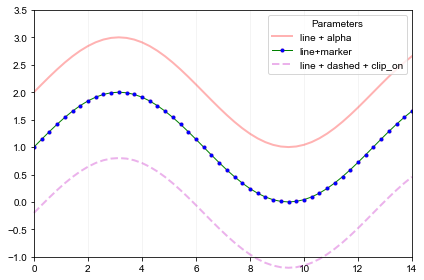

In [2]:
x = np.linspace(0,14,50)
y = np.sin(x / 2)
plt.figure()
ax=plt.gca()
ax.set_xlim(0,14)
ax.set_ylim(-1,3.5)
plt.plot(x, y + 2, color='r', alpha=0.3, label='line + alpha',lw=2)
plt.plot(x, y + 1, color='g', label='line+marker',lw=1,
         marker='o',markersize=4,markerfacecolor='b',markeredgecolor='r',markeredgewidth=0.1)
plt.plot(x, y-0.2, color='m', alpha=0.3, label='line + dashed + clip_on',lw=2,
         clip_on=False,linestyle='dashed')
plt.grid(axis='x', color='0.95')
plt.legend(title='Parameters')

# savefig
plt.tight_layout()
plt.savefig('../../figures/Chapter2/Lecture2_2_basic.pdf')
plt.show()

### 案例一
[Silica accelerates the selective hydrogenation of CO2 to methanol on cobalt catalysts, 2020, Nature Communications](https://doi.org/10.1038/s41467-020-14817-9)
Figure 3i

In [3]:
data=pd.read_excel('data/Wang2020/41467_2020_14817_MOESM3_ESM.xlsx',sheet_name='Figure 3i')

In [4]:
# print(data)

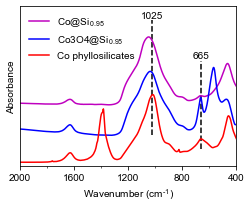

In [5]:
def plotfig3(ax,xname,yname,lc,label,movey=0.5):
    x=data[xname]
    y=data[yname]
    ax.plot(x,y+movey,'-',color=lc,label=label)
fig=plt.figure(figsize=(3.6,3))
ax=plt.gca()

# Co@Si0.95
plotfig3(ax,'Wavenumber(cm-1).2','Absorbance.2','m',label='Co@Si$_{\mathregular{0.95}}$',movey=0.85)
# Co3O4@Si0.95
plotfig3(ax,'Wavenumber(cm-1).1','Absorbance.1','b',label='Co3O4@Si$_{\mathregular{0.95}}$',movey=0.4)
# Co phyllosilicates
plotfig3(ax,'Wavenumber(cm-1)','Absorbance','r',label='Co phyllosilicates',movey=0)


# plot specific wavenumber
ax.vlines(x=1025,ymin=0.4,ymax=2.1,linestyle='dashed')
ax.text(1025,2.1,'1025',va='bottom',ha='center')
ax.vlines(x=665,ymin=0.2,ymax=1.5,linestyle='dashed')
ax.text(665,1.5,'665',va='bottom',ha='center')

# legend
ax.legend(loc='upper left',frameon=False)
# set axis
ax.set_xlim(2000,400)
ax.set_ylim(-0.05,2.3)
ax.yaxis.set_ticks([])
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavenumber (cm$^{\mathregular{-1}}$)')
ax.xaxis.set_major_locator(MultipleLocator(400))
ax.xaxis.set_minor_locator(MultipleLocator(200))
# savefig
plt.tight_layout()
plt.savefig('../../figures/Chapter2/Lecture2_2_case1.pdf')
plt.show()

### 案例2
[Shackleton et al., 2020. Nature Geoscience](https://doi.org/10.1038/s41561-019-0498-0)

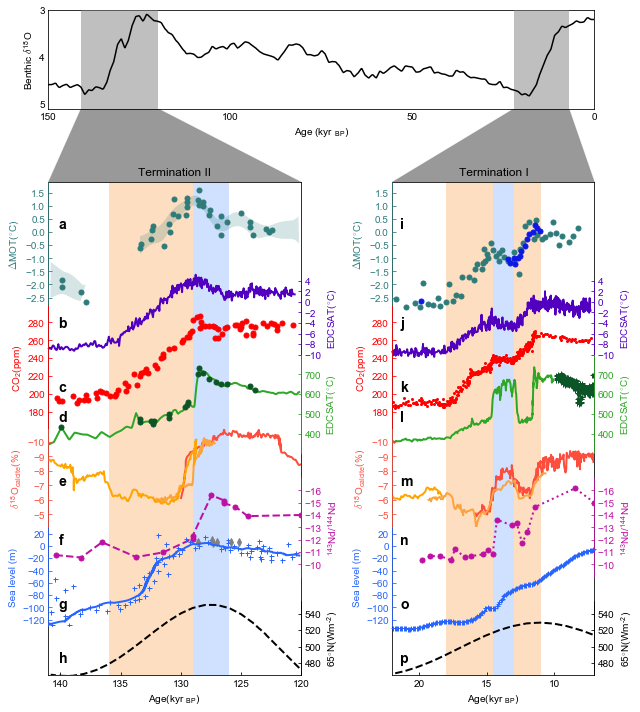

In [44]:
def addzoomindicate(ax,ax_zoom,xlims,ylims,fc='gray',alpha1=0.5,alpha2=1):
    rectpatch, connects=ax.indicate_inset_zoom(ax_zoom,fc=fc,alpha=alpha1,ec='none') #face color, edge color
    for con in connects:
        con.set_visible(False)
    cons=[]
    for j in range(2):
        xyA = (xlims[j], ylims[1])
        xyB = (xlims[j], ylims[0])
        connect = mpatches.ConnectionPatch(xyA, xyB, 'data', 'data',axesA=ax_zoom, axesB=ax, edgecolor='lightgray')
        ax_zoom.add_patch(connect)
        cons.append(connect)
    line2=cons[0].get_path().vertices
    line1=cons[1].get_path().vertices
    zoomcoords = sorted(np.concatenate((line1,line2)),key=lambda x: x[0])
    polygon_zoom = plt.Polygon(zoomcoords,ec='none',fc='gray',alpha=alpha2,clip_on=False)
    ax_zoom.add_artist(polygon_zoom)
def addsubplots(ax_par, y1, y2, pos_labels,ylims,major_locator,ylabel='',color='r',csv='',lw=2,marker='o',mfc='',ms=5,
                datapath='data/Shackleton2020',which='',plotaxis=True,ls='-',clip_on=True):
    if(plotaxis==True):
        ax=ax_par.inset_axes([0,y1,1,y2-y1],transform=ax_par.transAxes)
        ax.set_facecolor('none')
        ax.tick_params(axis='y',which='both',direction='in',color=color,labelcolor=color)
        ax.yaxis.set_ticks_position(pos_labels)
        ax.xaxis.set_ticks([])
        ax.set_ylim(ylims)
        xlims=ax_par.get_xlim()
        ax.set_xlim(xlims)
        ax.yaxis.set_major_locator(MultipleLocator(major_locator))
        ax.set_ylabel(ylabel,color=color)
        ax.yaxis.set_label_position(pos_labels)
        # only show yaxis
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines[pos_labels].set_visible(True)
        ax.spines[pos_labels].set_color(color)
    else:
        ax=ax_par
    # read data and plot
    data=pd.read_csv(datapath+'/'+csv)
    x=data.values[:,0]
    y=data.values[:,1]
    
    ind=((x>=np.min(ax_par.get_xlim())) & (x<=np.max(ax_par.get_xlim())))
    x=x[ind]
    y=y[ind]
    if(mfc==''):
        mfc=color
    ax.plot(x,y,lw=lw,color=color,linestyle=ls,marker=marker,markersize=ms,markerfacecolor=mfc,clip_on=clip_on)
    if(which=='a'):
        data=pd.read_csv(datapath+'/a2.csv')
        x1=data.values[:,0]
        y1=data.values[:,1]
        data=pd.read_csv(datapath+'/a3.csv')
        x2=data.values[:,0]
        y2=data.values[:,1]
        coords=np.column_stack((np.append(x1,x2),np.append(y1,y2)))
        polygon = plt.Polygon(coords,ec='none',fc=color,alpha=0.2,clip_on=False)
        ax.add_artist(polygon)
        data=pd.read_csv(datapath+'/a4.csv')
        x1=data.values[:,0]
        y1=data.values[:,1]
        data=pd.read_csv(datapath+'/a5.csv')
        x2=data.values[:,0]
        y2=data.values[:,1]
        coords=np.column_stack((np.append(x1,x2),np.append(y1,y2)))
        polygon = plt.Polygon(coords,ec='none',fc=color,alpha=0.2,clip_on=False)
        ax.add_artist(polygon)
    return ax,x,y
# 1. 总体布局
# 1.1 创建子图整列
fig,axs=plt.subplots(2,2,sharex=False,sharey=False,gridspec_kw={"width_ratios":[1,0.8],"height_ratios":[0.2,1]},
                         figsize=(9,10))
# 1.2. 获取子图网格对象
gs=axs[0][0].get_gridspec()
# 1.3. 在子图网格第二列范围内新建子图
axbig = fig.add_subplot(gs[0, :])
# 1.4. 删除不用的坐标轴
axs[0][0].remove()
axs[0][1].remove()
# 
ax_II=axs[1][0]
ax_I=axs[1][1]

# 2. plot O18
data=pd.read_csv('data/Shackleton2020/fig3_1.csv')
x=data.values[:,0]
y=data.values[:,1]
ax=axbig
ax.plot(x,y,color='k',zorder=10)
ax.set_xlim(150,0)
ax.set_ylim(5.1,3)
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.tick_params(axis='both',which='both',length=0)
ax.set_xlabel('Age (kyr $_{\mathregular{BP}}$)')
ax.set_ylabel('Benthic $\delta ^{\mathregular{18}}$O')

# 3. plot termination II and I
xlims_II = (141,120)
xlims_I = (22,7)
ylims = ax.get_ylim()
ax_II.set_xlim(xlims_II)
ax_II.set_ylim(ylims)
ax_I.set_xlim(xlims_I)
ax_I.set_ylim(ylims)
ax_II.yaxis.set_ticks([])
ax_II.xaxis.set_major_locator(MultipleLocator(5))
ax_II.tick_params(axis='x',which='both',direction='in')
ax_I.yaxis.set_ticks([])
ax_I.xaxis.set_major_locator(MultipleLocator(5))
ax_I.tick_params(axis='x',which='both',direction='in')
ax_II.set_xlabel('Age(kyr $_{\mathregular{BP}}$)')
ax_I.set_xlabel('Age(kyr $_{\mathregular{BP}}$)')

# 3.1 a
axa,x1,y1=addsubplots(ax_II,0.75,1,'left',(-2.8,1.9),0.5,'$\Delta$MOT($^{\circ}$C)',(46/255,123/255,122/255),
                      'a1.csv',lw=0,which='a')
# b
addsubplots(ax_II,0.65,0.8,'right',(-10,4),2,'EDCSAT($^{\circ}$C)',(81/255,0/255,191/255),
                      'b.csv',marker='',clip_on=False)
# c
addsubplots(ax_II,0.5,0.75,'left',(161,299),20,'CO$_{\mathregular{2}}$(ppm)',(255/255,0/255,0/255),
                      'c.csv',lw=0)
# d
axd,x,y=addsubplots(ax_II,0.45,0.65,'right',(301,799),100,'EDCSAT($^{\circ}$C)',(46/255,167/255,39/255),
                      'd2.csv',marker='')
addsubplots(axd,0.5,0.7,'right',(301,799),100,'EDCSAT($^{\circ}$C)',(11/255,85/255,38/255),
                      'd1.csv',lw=0,plotaxis=False)
# e
axe,x,y=addsubplots(ax_II,0.3,0.5,'left',(-4.1, -10.9),1,'$\delta ^{\mathregular{18}}$O$_{\mathregular{calcite}}$(%)',(252/255,77/255,61/255),
                      'e3.csv',marker='',lw=2)
addsubplots(axe,0.35,0.55,'left',(-4.1, -10.9),1,color=(253/255,163/255,61/255),
                      csv='e2.csv',marker='',plotaxis=False,lw=2)
addsubplots(axe,0.35,0.55,'left',(-4.1, -10.9),1,color='orange',
                      csv='e1.csv',marker='',plotaxis=False,lw=2)
# f
axd,x,y=addsubplots(ax_II,0.2,0.4,'right',(-9.01,-16.99),1,'$^{\mathregular{143}}$Nd/$^{\mathregular{144}}$Nd',(189/255,17/255,163/255),
                      'f.csv',ls='dashed')
# g
axg,x,y=addsubplots(ax_II,0.1,0.3,'left',(-130,30),20,'Sea level (m)',(40/255,101/255,255/255),
                      'g1.csv',marker='+',lw=0)
addsubplots(axg,0.1,0.3,'left',(-130,30),20,'Sea level (m)','gray',
                      'g2.csv',marker='d',lw=0,plotaxis=False)
addsubplots(axg,0.1,0.3,'left',(-130,30),20,'Sea level (m)',(40/255,101/255,255/255),
                      'g3.csv',marker='',plotaxis=False)
# h
axd,x,y=addsubplots(ax_II,0,0.15,'right',(465,555),20,'65$^{\circ}$N(Wm$^{\mathregular{-2}}$)','k',
                      'h.csv',ls='dashed',marker='',lw=2)

# ----------termination I
# i
axa,x1,y1=addsubplots(ax_I,0.75,1,'left',(-2.8,1.9),0.5,'$\Delta$MOT($^{\circ}$C)',(46/255,123/255,122/255),
                      'i1.csv',lw=0,clip_on=False)
addsubplots(axa,0.75,1,'left',(-2.8,1.9),0.5,'$\Delta$MOT($^{\circ}$C)',(14/255,24/255,230/255),
                      'i2.csv',lw=0,plotaxis=False)
# j
addsubplots(ax_I,0.65,0.8,'right',(-10,4),2,'EDCSAT($^{\circ}$C)',(81/255,0/255,191/255),
                      'j.csv',marker='',clip_on=False)
# k
addsubplots(ax_I,0.5,0.75,'left',(161,299),20,'CO$_{\mathregular{2}}$(ppm)',(255/255,0/255,0/255),
                      'k.csv',lw=0,ms=2)
# l
axl,x,y=addsubplots(ax_I,0.45,0.65,'right',(301,799),100,'EDCSAT($^{\circ}$C)',(46/255,167/255,39/255),
                      'l.csv',marker='')
addsubplots(axl,0.5,0.7,'right',(301,799),100,'EDCSAT($^{\circ}$C)',(11/255,85/255,38/255),
                      'l2.csv',lw=0,plotaxis=False,marker='+')
# m
axm,x,y=addsubplots(ax_I,0.3,0.5,'left',(-4.1, -10.9),1,'$\delta ^{\mathregular{18}}$O$_{\mathregular{calcite}}$(%)',(252/255,77/255,61/255),
                      'm3.csv',marker='',lw=2)
addsubplots(axm,0.35,0.55,'left',(-4.1, -10.9),1,color=(253/255,163/255,61/255),
                      csv='m2.csv',marker='',plotaxis=False,lw=2)
addsubplots(axm,0.35,0.55,'left',(-4.1, -10.9),1,color='orange',
                      csv='m1.csv',marker='',plotaxis=False,lw=2)
# n
axd,x,y=addsubplots(ax_I,0.2,0.4,'right',(-9.01,-16.99),1,'$^{\mathregular{143}}$Nd/$^{\mathregular{144}}$Nd',(189/255,17/255,163/255),
                      'n.csv',ls='dotted')
# o
axe,x,y=addsubplots(ax_I,0.1,0.3,'left',(-130,30),20,'Sea level (m)',(40/255,101/255,255/255),
                      'o.csv',marker='+',lw=0,clip_on=False)
# p
axd,x,y=addsubplots(ax_I,0,0.15,'right',(465,555),20,'65$^{\circ}$N(Wm$^{\mathregular{-2}}$)','k',
                      'p.csv',ls='dashed',marker='',lw=2)
# 4 标注
ax_II.axvspan(136, 129, facecolor=(254/255,222/255,192/255))
ax_II.axvspan(129, 126, facecolor=(207/255,225/255,255/255))
ax_I.axvspan(18, 11, facecolor=(254/255,222/255,192/255))
ax_I.axvspan(14.5, 13, facecolor=(207/255,225/255,255/255))
ax_II.text(0.5,1.01,'Termination II',transform=ax_II.transAxes,ha='center',va='bottom',fontsize=12)
ax_I.text(0.5,1.01,'Termination I',transform=ax_I.transAxes,ha='center',va='bottom',fontsize=12)
kwargs = dict(ha='left',va='bottom',fontweight='bold',fontsize=14)
x0=0.04
labels_II=['a','b','c','d','e','f','g','h']
labels_I=['i','j','k','l','m','n','o','p']
ys=[0.9,0.7,0.57,0.51,0.38,0.26,0.13,0.02]
for y0, label_II, label_I in zip(ys,labels_II,labels_I):
    ax_II.text(x0,y0,label_II,transform=ax_II.transAxes,**kwargs)
    ax_I.text(x0,y0,label_I,transform=ax_I.transAxes,**kwargs)

# savefig
plt.tight_layout(h_pad=3)

# # 3. 添加一个指示框: 必须在调整布局之后进行，否则坐标系之间的计算会有错乱
addzoomindicate(axbig,ax_II,xlims_II,ylims,alpha2=0.8)
addzoomindicate(axbig,ax_I,xlims_I,ylims,alpha2=0.8)

plt.savefig('../../figures/Chapter2/Lecture2_2_case3_8.pdf')
plt.show()

### 案例3
[Silica accelerates the selective hydrogenation of CO2 to methanol on cobalt catalysts, 2020, Nature Communications](https://doi.org/10.1038/s41467-020-14817-9)
Figure 4

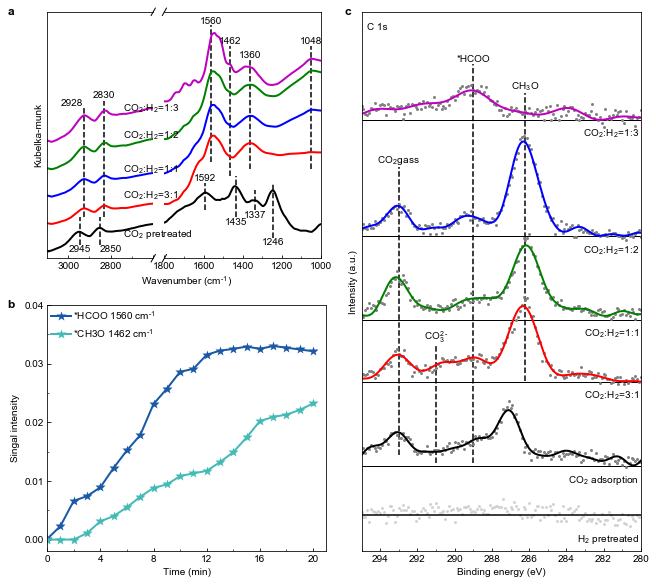

In [362]:
import scipy.fftpack
def brokenAxis(ax,ratio=0.4,spacing=0.02):
    ax_a1=ax.inset_axes([0,0,ratio-spacing,1],transform=ax.transAxes)
    ax_a2=ax.inset_axes([ratio+spacing,0,1-ratio-2*spacing,1],transform=ax.transAxes)
    ax_a1.spines['right'].set_visible(False)
    ax_a2.yaxis.set_ticks([])
    ax_a2.spines['left'].set_visible(False)
    # 绘制broken线
    d = .015 
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False, linewidth=1)
    ax_a1.plot((ratio-spacing-d/2, ratio-spacing+d/2), (1-d, 1+d), **kwargs) 
    ax_a1.plot((ratio-spacing-d/2, ratio-spacing+d/2), (-d, +d), **kwargs)
    ax_a2.plot((ratio+spacing-d/2, ratio+spacing+d/2), (1-d, 1+d), **kwargs) 
    ax_a2.plot((ratio+spacing-d/2, ratio+spacing+d/2), (-d, +d), **kwargs)
    # hide ticks and spines of ax
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    #
    ax_a1.set_ylim(-0.1,3.5)
    ax_a2.set_ylim(-0.1,3.5)
    ax_a1.set_ylabel('Kubelka-munk')
    ax_a1.xaxis.set_major_locator(MultipleLocator(200))
    ax_a1.xaxis.set_minor_locator(MultipleLocator(100))
    ax_a1.tick_params(axis='x', which='both', direction='in')
    ax_a2.xaxis.set_major_locator(MultipleLocator(200))
    ax_a2.xaxis.set_minor_locator(MultipleLocator(100))
    ax_a2.tick_params(axis='x', which='both', direction='in')
    ax.set_xlabel('Wavenumber (cm$^{\mathregular{-1}}$)',labelpad=15)
    return ax_a1, ax_a2 
def plotline(ax,xname,yname,lc,label='',movey=0,lw=2,marker='*',ms=10,mfc='w'):
    x=data[xname].values
    y=data[yname].values
    ax.plot(x,y+movey,'-',color=lc,label=label,linewidth=lw,marker=marker,markeredgecolor='none',
            markersize=ms,markerfacecolor=mfc)
    return np.array(x),np.array(y)
def plot_c(ax,xname,yname,lc,label='',movey=0,lw=2,marker='*',ms=10,mfc='w'):
    x=data[xname].values
    y=data[yname].values
    ax.plot(x,y+movey,'-',color=lc,label=label,linewidth=0,marker=marker,markeredgecolor='none',
            markersize=ms,markerfacecolor=mfc)
    # 滤波
    if(lw!=0):
        N = len(x)
        w = scipy.fftpack.rfft(y)
        f = scipy.fftpack.rfftfreq(N, x[1]-x[0])
        spectrum = w**2
        cutoff_idx = spectrum < (spectrum.max()/30000)
        w2 = w.copy()
        w2[cutoff_idx] = 0
        y2 = scipy.fftpack.irfft(w2)
        ax.plot(x,y2+movey,'-',color=lc,label=label,linewidth=lw)
        ax.hlines(y=np.min(y2)+movey,xmin=np.min(x),xmax=np.max(x),linewidth=1)
        ax.text(280.1,np.min(y2)+movey-10,label,ha='right',va='top')
    return np.array(x),np.array(y)
def plot_a(ax1,ax2,xname,yname,lc,label='',movey=0,lw=2):
    x=data[xname].values
    y=data[yname].values
    ind_broken=np.where(x=='--')[0][0]
    x2=x[0:ind_broken]
    y2=y[0:ind_broken]
    x1=x[ind_broken+1:-1]
    y1=y[ind_broken+1:-1]
    ax1.plot(x1,y1+movey,'-',color=lc,label=label,linewidth=lw)
    ax2.plot(x2,y2+movey,'-',color=lc,label=label,linewidth=lw)
    return x1,y1,x2,y2
# 1.1 创建子图整列
fig,axs=plt.subplots(2,2,sharex=False,sharey=False,gridspec_kw={"width_ratios":[1,1],"height_ratios":[1,1]},
                         figsize=(9,8),constrained_layout=True)
# 1.2. 获取子图网格对象
gs=axs[0][0].get_gridspec()
# 1.3. 在子图网格第二列范围内新建子图
axbig = fig.add_subplot(gs[:, 1])
# 1.4. 删除不用的坐标轴
axs[0][1].remove()
axs[1][1].remove()

# Figure 4a
data=pd.read_excel('data/Wang2020/41467_2020_14817_MOESM3_ESM.xlsx',sheet_name='Figure 4a')
ax=axs[0][0]
# 技巧：broken axis,（1）用图中图的方式解决；（2）直接在上面创建子图整列时创建两行三列，然后布局（留作大家思考自己练习！）
# 思路：按照比例创建两个图中坐标系，然后分别绘制曲线，再做一些设置
ax_a1, ax_a2=brokenAxis(ax)
x1,y1,x2,y2=plot_a(ax_a1,ax_a2,'Wavenumber(cm-1)','CO2 pretreated','k')
plot_a(ax_a1,ax_a2,'Wavenumber(cm-1)','CO2:H2=3:1','r',movey=0.4)
plot_a(ax_a1,ax_a2,'Wavenumber(cm-1)','CO2:H2=1:1','b',movey=0.8)
plot_a(ax_a1,ax_a2,'Wavenumber(cm-1)','CO2:H2=1:2','g',movey=1.2)
plot_a(ax_a1,ax_a2,'Wavenumber(cm-1)','CO2:H2=1:3','m',movey=1.6)
# axis settings
ax_a1.set_xlim(np.max(x1),np.min(x1))
ax_a2.set_xlim(np.max(x2),np.min(x2))
ax_a1.xaxis.set_ticklabels(['','','2800','3000'])
ax_a1.yaxis.set_ticks([])
# text
ax_a1.vlines(x=2945,ymin=0.1,ymax=0.5,linestyle='dashed')
ax_a1.text(2945,0.1,'2945',va='top',ha='center')
ax_a1.vlines(x=2850,ymin=0.1,ymax=0.5,linestyle='dashed')
ax_a1.text(2850,0.1,'2850',va='top',ha='left')
ax_a1.vlines(x=2928,ymin=0.5,ymax=2.1,linestyle='dashed')
ax_a1.text(2928,2.1,'2928',va='bottom',ha='right')
ax_a1.vlines(x=2830,ymin=0.5,ymax=2.2,linestyle='dashed')
ax_a1.text(2830,2.21,'2830',va='bottom',ha='center')
ax_a2.text(2010,0.25,'CO$_{\mathregular{2}}$ pretreated',ha='left',va='center')
ax_a2.text(2010,0.73,'CO$_{\mathregular{2}}$:H$_{\mathregular{2}}$=3:1',ha='left',va='bottom')
ax_a2.text(2010,1.1,'CO$_{\mathregular{2}}$:H$_{\mathregular{2}}$=1:1',ha='left',va='bottom')
ax_a2.text(2010,1.6,'CO$_{\mathregular{2}}$:H$_{\mathregular{2}}$=1:2',ha='left',va='bottom')
ax_a2.text(2010,2.0,'CO$_{\mathregular{2}}$:H$_{\mathregular{2}}$=1:3',ha='left',va='bottom')
ax_a2.vlines(x=1560,ymin=1.3,ymax=3.3,linestyle='dashed')
ax_a2.text(1560,3.3,'1560',va='bottom',ha='center')
ax_a2.vlines(x=1462,ymin=1.1,ymax=3,linestyle='dashed')
ax_a2.text(1462,3,'1462',va='bottom',ha='center')
ax_a2.vlines(x=1360,ymin=1.2,ymax=2.8,linestyle='dashed')
ax_a2.text(1360,2.8,'1360',va='bottom',ha='center')
ax_a2.vlines(x=1048,ymin=1.2,ymax=3,linestyle='dashed')
ax_a2.text(1048,3,'1048',va='bottom',ha='center')
ax_a2.vlines(x=1592,ymin=0.6,ymax=1,linestyle='dashed')
ax_a2.text(1592,1,'1592',va='bottom',ha='center')
ax_a2.vlines(x=1435,ymin=0.5,ymax=1.1,linestyle='dashed')
ax_a2.text(1435,0.5,'1435',va='top',ha='center')
ax_a2.vlines(x=1337,ymin=0.6,ymax=0.9,linestyle='dashed')
ax_a2.text(1337,0.6,'1337',va='top',ha='center')
ax_a2.vlines(x=1246,ymin=0.2,ymax=1,linestyle='dashed')
ax_a2.text(1246,0.2,'1246',va='top',ha='center')
ax.text(-0.13,1,'a',fontweight='bold',fontsize=12,va='center',ha='center',transform=ax.transAxes)

# Figure 4b
data=pd.read_excel('data/Wang2020/41467_2020_14817_MOESM3_ESM.xlsx',sheet_name='Figure 4b')
ax=axs[1][0]
plotline(ax,'time(min)','*HCOO 1560 cm-1',(26/255,89/255,166/255),
         label='*HCOO 1560 cm$^{\mathregular{-1}}$',mfc=(26/255,89/255,166/255))
plotline(ax,'time(min)',' *CH3O 1462 cm-1',(68/255,186/255,182/255),
         label='*CH3O 1462 cm$^{\mathregular{-1}}$',mfc=(68/255,186/255,182/255))
ax.legend(loc='upper left',frameon=False,borderaxespad=0,handletextpad=0.2)
ax.set_xlim(0,21)
ax.set_ylim(-0.002,0.04)
ax.set_xlabel('Time (min)')
ax.set_ylabel('Singal intensity')
ax.xaxis.set_major_locator(MultipleLocator(4))
ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.tick_params(axis='x', which='both', direction='in')
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.yaxis.set_minor_locator(MultipleLocator(0.005))
ax.tick_params(axis='y', which='both', direction='in')
ax.text(-0.13,1,'b',fontweight='bold',fontsize=12,va='center',ha='center',transform=ax.transAxes)

# Figure 4c
data=pd.read_excel('data/Wang2020/41467_2020_14817_MOESM3_ESM.xlsx',sheet_name='Figure 4c')
ax=axbig
x,y=plot_c(ax,'Binding energy (eV)','H2 pretreated','k',lw=0,marker='o',mfc='lightgray',ms=3)
ax.hlines(y=np.mean(y),xmin=np.min(x),xmax=np.max(x),zorder=3)
ax.text(280.1,np.min(y),'H$_{\mathregular{2}}$ pretreated',ha='right',va='top')
plot_c(ax,'Binding energy (eV)','CO2 adsorption','k','CO$_{\mathregular{2}}$ adsorption',movey=100,marker='o',mfc='gray',ms=3)
plot_c(ax,'Binding energy (eV)','CO2:H2=3:1','r','CO$_{\mathregular{2}}$:H$_{\mathregular{2}}$=3:1',movey=200,marker='o',mfc='gray',ms=3)
plot_c(ax,'Binding energy (eV)','CO2:H2=1:1','g','CO$_{\mathregular{2}}$:H$_{\mathregular{2}}$=1:1',movey=300,marker='o',mfc='gray',ms=3)
plot_c(ax,'Binding energy (eV)','CO2:H2=1:2','b','CO$_{\mathregular{2}}$:H$_{\mathregular{2}}$=1:2',movey=400,marker='o',mfc='gray',ms=3)
plot_c(ax,'Binding energy (eV)','CO2:H2=1:3','m','CO$_{\mathregular{2}}$:H$_{\mathregular{2}}$=1:3',movey=550,marker='o',mfc='gray',ms=3)
ax.set_ylabel('Intensity (a.u.)')
ax.set_xlabel('Binding energy (eV)')
ax.set_xlim(295,280)
ax.set_ylim(120,850)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='x', which='both', direction='in')
ax.yaxis.set_ticks([])
# text
ax.vlines(x=293,ymin=250,ymax=640,linestyle='dashed')
ax.text(293,640,'CO$_{\mathregular{2}}$gass',ha='center',va='bottom')
ax.vlines(x=291,ymin=240,ymax=400,linestyle='dashed')
ax.text(291,400,'CO$_{\mathregular{3}}^{\mathregular{2-}}$',ha='center',va='bottom')
ax.vlines(x=289,ymin=240,ymax=780,linestyle='dashed')
ax.text(289,780,'*HCOO',ha='center',va='bottom')
ax.vlines(x=286.2,ymin=350,ymax=740,linestyle='dashed')
ax.text(286.2,740,'CH$_{\mathregular{3}}$O',ha='center',va='bottom')
ax.text(0.02,0.98,'C 1s',va='top',ha='left',transform=ax.transAxes)
ax.text(-0.05,1,'c',fontweight='bold',fontsize=12,va='center',ha='center',transform=ax.transAxes)
# save fig
plt.savefig('../../figures/Chapter2/Lecture2_2_case2_10.pdf')

### 练习
[Silica accelerates the selective hydrogenation of CO2 to methanol on cobalt catalysts, 2020, Nature Communications](https://doi.org/10.1038/s41467-020-14817-9)
Figure 3i-l

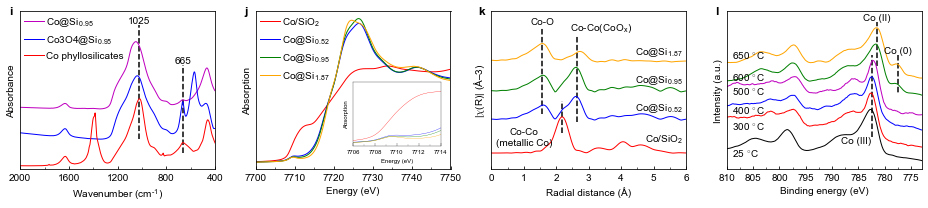

In [426]:
def plotfig3(ax,xname,yname,lc,label,movey=0,lw=1):
    x=data[xname]
    y=data[yname]
    ax.plot(x,y+movey,'-',color=lc,label=label,linewidth=lw)
    return np.array(x),np.array(y)
fig,axs=plt.subplots(1,4,figsize=(13,3))

# figure 3i
ax=axs[0]
data=pd.read_excel('data/Wang2020/41467_2020_14817_MOESM3_ESM.xlsx',sheet_name='Figure 3i')
# Co@Si0.95
plotfig3(ax,'Wavenumber(cm-1).2','Absorbance.2','m',label='Co@Si$_{\mathregular{0.95}}$',movey=0.85)
# Co3O4@Si0.95
plotfig3(ax,'Wavenumber(cm-1).1','Absorbance.1','b',label='Co3O4@Si$_{\mathregular{0.95}}$',movey=0.4)
# Co phyllosilicates
plotfig3(ax,'Wavenumber(cm-1)','Absorbance','r',label='Co phyllosilicates',movey=0)
# legend
ax.legend(loc='upper left',frameon=False,borderaxespad=0,handletextpad=0.2)
ax.text(-0.05,1,'i',fontweight='bold',fontsize=12,va='center',ha='center',transform=ax.transAxes)
# plot specific wavenumber
ax.vlines(x=1025,ymin=0.4,ymax=2.1,linestyle='dashed')
ax.text(1025,2.1,'1025',va='bottom',ha='center')
ax.vlines(x=665,ymin=0.2,ymax=1.5,linestyle='dashed')
ax.text(665,1.5,'665',va='bottom',ha='center')

# set axis
ax.set_xlim(2000,400)
ax.set_ylim(-0.05,2.3)
ax.yaxis.set_ticks([])
ax.set_ylabel('Absorbance')
ax.set_xlabel('Wavenumber (cm$^{\mathregular{-1}}$)')
ax.xaxis.set_major_locator(MultipleLocator(400))
ax.xaxis.set_minor_locator(MultipleLocator(200))
ax.tick_params(axis='x', which='both', direction='in')

# figure 3j
ax=axs[1]
data=pd.read_excel('data/Wang2020/41467_2020_14817_MOESM3_ESM.xlsx',sheet_name='Figure 3j')
# Co/SiO2
plotfig3(ax,'Energy (eV)','Co/SiO2','r',label='Co/SiO$_{\mathregular{2}}$',movey=0)
# Co@Si0.52
plotfig3(ax,'Energy (eV)',' Co@Si0.52','b',label='Co@Si$_{\mathregular{0.52}}$',movey=0)
# Co@Si0.95
plotfig3(ax,'Energy (eV)',' Co@Si0.95','g',label='Co@Si$_{\mathregular{0.95}}$',movey=0)
# Co@Si1.87
plotfig3(ax,'Energy (eV)',' Co@Si1.87','orange',label='Co@Si$_{\mathregular{1.87}}$',movey=0)
# legend
ax.legend(loc='upper left',frameon=False,borderaxespad=0,handletextpad=0.2)
ax.text(-0.05,1,'j',fontweight='bold',fontsize=12,va='center',ha='center',transform=ax.transAxes)
# set axis
ax.set_xlim(7700,7750)
# ax.set_ylim(-0.05,2.3)
ax.yaxis.set_ticks([])
ax.set_ylabel('Absorption')
ax.set_xlabel('Energy (eV)')
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(axis='x', which='both', direction='in')
# 局部放大图
axin=ax.inset_axes([0.5,0.15,0.45,0.4],transform=ax.transAxes)
fontsize_axin=6
lw=0.3
axin.yaxis.set_ticks([])
axin.set_xlim(7706,7714)
axin.set_ylim(-0.01,0.45)
axin.xaxis.set_major_locator(MultipleLocator(2))
axin.xaxis.set_minor_locator(MultipleLocator(1))
axin.set_xlabel('Energy (eV)',fontsize=fontsize_axin)
axin.set_ylabel('Absorption',fontsize=fontsize_axin)
axin.tick_params(axis='x', which='major',labelsize=fontsize_axin,width=lw,direction='in')
axin.tick_params(axis='x', which='minor',width=lw/2,direction='in')
axin.spines['right'].set_linewidth(lw)
axin.spines['left'].set_linewidth(lw)
axin.spines['top'].set_linewidth(lw)
axin.spines['bottom'].set_linewidth(lw)
ax=axin
# Co/SiO2
plotfig3(ax,'Energy (eV)','Co/SiO2','r',label='Co/SiO$_{\mathregular{2}}$',lw=lw)
# Co@Si0.52
plotfig3(ax,'Energy (eV)',' Co@Si0.52','b',label='Co@Si$_{\mathregular{0.52}}$',lw=lw)
# Co@Si0.95
plotfig3(ax,'Energy (eV)',' Co@Si0.95','g',label='Co@Si$_{\mathregular{0.95}}$',lw=lw)
# Co@Si1.87
plotfig3(ax,'Energy (eV)',' Co@Si1.87','orange',label='Co@Si$_{\mathregular{1.87}}$',lw=lw)

# figure 3k
ax=axs[2]
data=pd.read_excel('data/Wang2020/41467_2020_14817_MOESM3_ESM.xlsx',sheet_name='Figure 3k')
# Co/SiO2
x,y=plotfig3(ax,'Radial distance (Å)','Co/SiO2','r',label='Co/SiO$_{\mathregular{2}}$',movey=0)
ax.text(5.9,0.4,'Co/SiO$_{\mathregular{2}}$',ha='right',va='bottom')
ax.vlines(x=x[np.argmax(y)],ymin=np.max(y)-0.8,ymax=np.max(y)+0.8,linestyle='dashed')
ax.text(1,0.3,'Co-Co\n(metallic Co)',va='bottom',ha='center')
# Co@Si0.52
plotfig3(ax,'Radial distance (Å)',' Co@Si0.52','b',label='Co@Si$_{\mathregular{0.52}}$',movey=1.6)
ax.text(5.9,1.9,'Co@Si$_{\mathregular{0.52}}$',ha='right',va='bottom')
# Co@Si0.95
plotfig3(ax,'Radial distance (Å)',' Co@Si0.95','g',label='Co@Si$_{\mathregular{0.95}}$',movey=3)
ax.text(5.9,3.3,'Co@Si$_{\mathregular{0.95}}$',ha='right',va='bottom')
# Co@Si1.87
x,y=plotfig3(ax,'Radial distance (Å)',' Co@Si1.87','orange',label='Co@Si$_{\mathregular{1.87}}$',movey=4.5)
ax.text(5.9,4.7,'Co@Si$_{\mathregular{1.87}}$',ha='right',va='bottom')

ax.vlines(x=x[np.argmax(y)],ymin=np.max(y)+4.5-3.5,ymax=np.max(y)+4.5+0.8,linestyle='dashed')
ax.text(x[np.argmax(y)],np.max(y)+4.5+0.85,'Co-O',va='bottom',ha='center')
ind=(x>2)
x=x[ind]
y=y[ind]
ax.vlines(x=x[np.argmax(y)]-0.1,ymin=np.max(y)+4.5-3.5,ymax=np.max(y)+4.5+0.8,linestyle='dashed')
ax.text(x[np.argmax(y)]-0.3,np.max(y)+4.5+0.85,'Co-Co(CoO$_{\mathregular{x}}$)',va='bottom',ha='left')

# label
ax.text(-0.05,1,'k',fontweight='bold',fontsize=12,va='center',ha='center',transform=ax.transAxes)
# set axis
ax.set_xlim(0,6)
ax.set_ylim(-0.8,7)
ax.yaxis.set_ticks([])
ax.set_ylabel('|$\chi$(R)| (Å–3)')
ax.set_xlabel('Radial distance (Å)')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(.5))
ax.tick_params(axis='x', which='both', direction='in')

# figure 3l
ax=axs[3]
data=pd.read_excel('data/Wang2020/41467_2020_14817_MOESM3_ESM.xlsx',sheet_name='Figure 3l')
# 25 °C
x,y=plotfig3(ax,'Binding energy (eV)','25 °C','k',label='Co/SiO$_{\mathregular{2}}$',movey=0)
ax.text(809,0.3,'25 $^{\circ}$C',ha='left',va='top')
# 300 °C
x,y=plotfig3(ax,'Binding energy (eV)','300 °C','r',label='Co/SiO$_{\mathregular{2}}$',movey=0.3)
ax.text(809,0.8,'300 $^{\circ}$C',ha='left',va='top')
# 400 °C
x,y=plotfig3(ax,'Binding energy (eV)','400 °C','b',label='Co/SiO$_{\mathregular{2}}$',movey=0.6)
ax.text(809,1,'400 $^{\circ}$C',ha='left',va='center')
# 500 °C
x,y=plotfig3(ax,'Binding energy (eV)','500 °C','m',label='Co/SiO$_{\mathregular{2}}$',movey=0.9)
ax.text(809,1.45,'500 $^{\circ}$C',ha='left',va='top')
# 600 °C
x,y=plotfig3(ax,'Binding energy (eV)','600 °C','g',label='Co/SiO$_{\mathregular{2}}$',movey=1.2)
ax.text(809,1.5,'600 $^{\circ}$C',ha='left',va='bottom')
# 650 °C
x,y=plotfig3(ax,'Binding energy (eV)','650 °C','orange',label='Co/SiO$_{\mathregular{2}}$',movey=1.5)
ax.text(809,2.0,'650 $^{\circ}$C',ha='left',va='center')

ax.vlines(x=782.5,ymin=0.5,ymax=2,linestyle='dashed')
ax.text(782.5, 0.5,'Co (III)',va='top',ha='right')
ax.vlines(x=781.5,ymin=1.8,ymax=2.6,linestyle='dashed')
ax.text(781.5, 2.6,'Co (II)',va='bottom',ha='center')
ax.vlines(x=777.5,ymin=2.0,ymax=1.3,linestyle='dashed')
ax.text(777.5, 2.0,'Co (0)',va='bottom',ha='center')
# label
ax.text(-0.05,1,'l',fontweight='bold',fontsize=12,va='center',ha='center',transform=ax.transAxes)
# set axis
ax.set_xlim(810,773)
ax.set_ylim(-0.1,2.8)
ax.yaxis.set_ticks([])
ax.set_ylabel('Intensity (a.u.)')
ax.set_xlabel('Binding energy (eV)')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(2.5))
ax.tick_params(axis='x', which='both', direction='in')

# savefig
plt.tight_layout()
plt.savefig('../../figures/Chapter2/Lecture2_practice.pdf')
plt.show()